In [1]:
import numpy as np
import matplotlib.pyplot as plt
import swprocess

In [2]:
names = None
workflow = "time-domain"
trim, trim_begin, trim_end = False, 0, 0.5

# Mute portions of the time-domain record to isolate surface wave energy. No muting is recommended.
# Mute method {"interactive"} and window_kwargs (see documenation for details).
mute, method, window_kwargs = False, "interactive", {}

# Zero pad the time-domain record to achieve a desired frequency step. Padding with df=0.5 is recommended.
pad, df = True, 0.1
transform = "fdbf"

# Minimum and maximum frequencies of interest (frequency in Hertz).
fmin, fmax = 3, 10

# Selection of trial velocities (velocity in m/s) with minimum, maximum, number of steps, and space {"linear", "log"}.  
vmin, vmax, nvel, vspace = 100, 500, 500, "linear"

# Weighting for "fdbf" {"sqrt", "invamp", "none"} (ignored for all other wavefield transforms). "sqrt" is recommended. 
fdbf_weighting = "sqrt"

# Steering vector for "fdbf" {"cylindrical", "plane"} (ignored for all other wavefield transforms). "cylindrical" is recommended.
fdbf_steering = "cylindrical"
snr = False

# Define noise and signal windows being and end times (time in seconds). Negative time refers to pre-trigger record.
noise_begin, noise_end =  0., 0.
signal_begin, signal_end = 0., 0.1

# Zero pad the noise and signal records to achieve a specified frequency step. Padding with df=1 is recommended.
pad_snr, df_snr = True, 1
%matplotlib qt5
settings = swprocess.Masw.create_settings_dict(workflow=workflow,
                                               trim=trim, trim_begin=trim_begin, trim_end=trim_end,
                                               mute=mute, method=method, window_kwargs=window_kwargs,
                                               transform=transform, fmin=fmin, fmax=fmax, pad=pad, df=df,
                                               vmin=vmin, vmax=vmax, nvel=nvel, vspace=vspace,
                                               weighting=fdbf_weighting, steering=fdbf_steering,
                                               snr=snr, noise_begin=noise_begin, noise_end=noise_end,
                                               signal_begin=signal_begin, signal_end=signal_end,
                                               pad_snr = pad_snr, df_snr=df_snr)

#settings = swprocess.Masw.create_settings_dict()
wavefieldtransform = swprocess.Masw.run(fnames="./Train_data/SGY/1.sgy", settings=settings)

In [3]:
wavefield_normalization = "frequency-maximum"

# Display the wavelength resolution limit.
display_lambda_res = False

# Display Yoon and Rix (2009) near-field criteria
display_nearfield = False
number_of_array_center_distances = 1
minimum_snr = 3.2

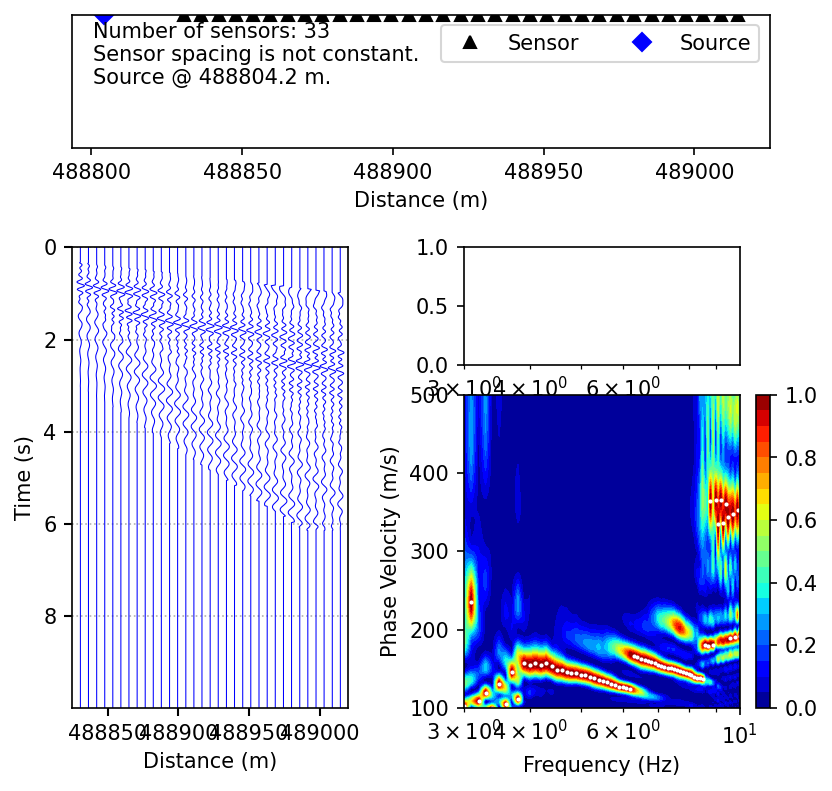

In [4]:
from matplotlib.gridspec import GridSpec
%matplotlib inline
figures = []
fig = plt.figure(figsize=(6,6), dpi=150)

gs = GridSpec(nrows=4, ncols=4, height_ratios=(1.7, 0.5, 1.5, 4), width_ratios=(1, 0.3, 1, 0.05), hspace=0.2, wspace=0.1)
ax0 = fig.add_subplot(gs[0, :])
ax1 = fig.add_subplot(gs[2:4, 0])
ax2 = fig.add_subplot(gs[2, 2])
ax3 = fig.add_subplot(gs[3, 2])
ax4 = fig.add_subplot(gs[3, 3])

# Array
wavefieldtransform.array.plot(ax=ax0)
ax0.set_yticks([])
ax0.legend(ncol=2)

# Timeseries
wavefieldtransform.array.waterfall(ax=ax1, amplitude_detrend=False, amplitude_normalization="each")
if trim:
    ax1.set_ylim((trim_end, trim_begin))

# Dispersion Image
nearfield = number_of_array_center_distances if display_nearfield else None
wavefieldtransform.plot(fig=fig, ax=ax3, cax=ax4, normalization=wavefield_normalization, nearfield=nearfield)
xlim = ax3.get_xlim()
ylim = ax3.get_ylim()
if display_lambda_res:
    kres_format = dict(linewidth=1.5, color="#000000", linestyle="--")
    kres = wavefieldtransform.array.kres
    kvelocity = 2*np.pi*wavefieldtransform.frequencies / kres
    ax3.plot(wavefieldtransform.frequencies, kvelocity, label=r"$\lambda_{a,min}$" + f"={np.round(2*np.pi/kres,2)} m", **kres_format)
    ax3.legend(loc="upper right")
ax3.set_xlim(xlim)
ax2.set_xlim(xlim)
ax3.set_ylim(ylim)
ax2.set_xscale("log")
ax2.set_xticks([])
ax3.set_xscale("log")

figures.append(fig)
plt.show()


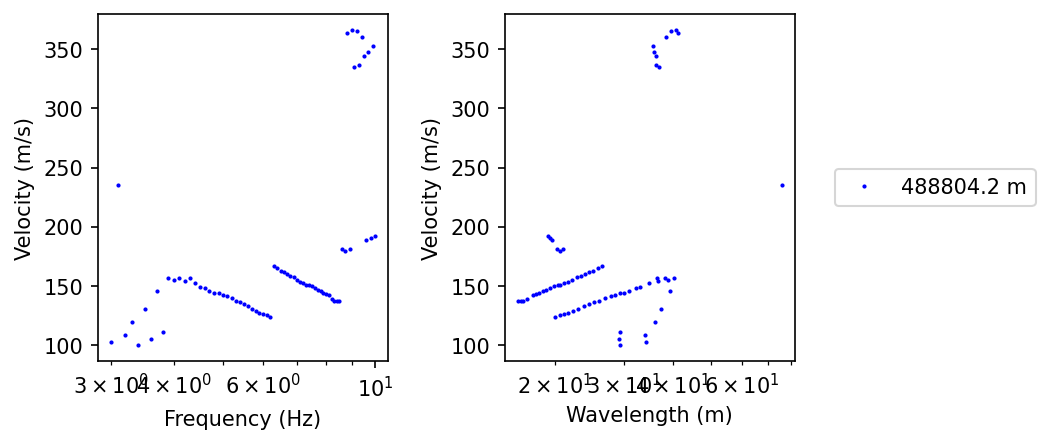

In [5]:
import matplotlib as mpl
# Domains in which to plot the experimental dispersion data.
domains = [
    ["frequency", "velocity"],
    ["wavelength", "velocity"],
]
%matplotlib inline
xtype = [x for x, _ in domains]
ytype = [y for _, y in domains]
label = [f"{wavefieldtransform.array.source.x:.1f} m"]

fig, axs = plt.subplots(ncols=len(xtype), figsize=(6,3), dpi=150, gridspec_kw=dict(wspace=0.4))
peak = swprocess.peaks.Peaks(wavefieldtransform.frequencies,
                             wavefieldtransform.find_peak_power(by="frequency-maximum"),
                             identifier=label)
peaksuite = swprocess.PeaksSuite.from_peaks([peak])
peaksuite.plot(xtype=xtype, ax=axs, ytype=ytype, plot_kwargs=dict(color="blue", label=label))

axs[-1].legend(bbox_to_anchor = (1.1, 0.5), loc="center left")
plt.show()

In [6]:
# wl, velo1 = peaksuite.to_array("wavelength", "velocity", peak.wavelength)
fr, velo = peaksuite.to_array("frequency", "velocity", peak.frequency)


In [7]:
print(fr.reshape((1,-1)).tolist())

[[3.0, 3.1, 3.2, 3.3000000000000003, 3.4000000000000004, 3.5, 3.6, 3.7, 3.8000000000000003, 3.9000000000000004, 4.0, 4.1000000000000005, 4.2, 4.3, 4.4, 4.5, 4.6000000000000005, 4.7, 4.800000000000001, 4.9, 5.0, 5.1000000000000005, 5.2, 5.300000000000001, 5.4, 5.5, 5.6000000000000005, 5.7, 5.800000000000001, 5.9, 6.0, 6.1000000000000005, 6.2, 6.300000000000001, 6.4, 6.5, 6.6000000000000005, 6.7, 6.800000000000001, 6.9, 7.0, 7.1000000000000005, 7.2, 7.300000000000001, 7.4, 7.5, 7.6000000000000005, 7.7, 7.800000000000001, 7.9, 8.0, 8.1, 8.200000000000001, 8.3, 8.4, 8.5, 8.6, 8.700000000000001, 8.8, 8.9, 9.0, 9.1, 9.200000000000001, 9.3, 9.4, 9.5, 9.600000000000001, 9.700000000000001, 9.8, 9.9, 10.0]]


In [8]:
velo

array([[102.40480962, 235.47094188, 108.81763527, 119.23847695,
        100.        , 130.46092184, 104.80961924, 145.69138277,
        111.22244489, 156.91382766, 155.31062124, 156.91382766,
        154.50901804, 156.91382766, 152.90581162, 148.89779559,
        148.09619238, 145.69138277, 144.08817635, 144.08817635,
        142.48496994, 141.68336673, 140.08016032, 137.6753507 ,
        136.07214429, 134.46893788, 132.86573146, 130.46092184,
        128.85771543, 127.25450902, 126.45290581, 125.65130261,
        124.04809619, 166.53306613, 164.92985972, 162.5250501 ,
        161.72344689, 160.12024048, 158.51703407, 157.71543086,
        155.31062124, 153.70741483, 152.10420842, 150.501002  ,
        150.501002  , 149.6993988 , 148.09619238, 146.49298597,
        145.69138277, 144.08817635, 143.28657315, 142.48496994,
        139.27855711, 137.6753507 , 137.6753507 , 136.87374749,
        180.96192385, 179.35871743, 363.72745491, 180.96192385,
        366.13226453, 334.86973948, 365.

In [9]:
# Находим индекс начала нужного отрезка
window_size = 5
threshold_std = 15
threshold_slope = -0.5
std_devs = [np.std(velo.reshape((-1,1))[i:i+window_size]) for i in range(len(velo.reshape((-1,1))) - window_size + 1)]
def find_significant_drop(std_devs, threshold_std=10):
    for i in range(1, len(std_devs)):
        if np.abs(std_devs[i-1] - std_devs[i]) > threshold_std:
            return i
    return -1

start_index = find_significant_drop(std_devs)

# Находим индекс конца нужного отрезка
def find_end(y, start_index, threshold_slope):
    for i in range(start_index, len(y) - 1):
        if (y[i+1] - y[i]) > threshold_slope:
            return i
    return len(y) - 1

end_index = find_end(velo.reshape((-1,1)), start_index, threshold_slope)

# Выделяем нужные точки
x_needed = fr[start_index:end_index+1]
y_needed = velo.reshape((-1,1))[start_index:end_index+1]

print(f"Нужные точки x: {x_needed}")
print(f"Нужные точки y: {y_needed}")


Нужные точки x: [3.2]
Нужные точки y: [[108.81763527]]


In [10]:
std_devs

[51.57393180946534,
 49.40009428924079,
 10.925354733403333,
 16.737966346950785,
 17.117560323897898,
 19.787750099386418,
 22.28745241652204,
 17.500670523761368,
 17.89999883220496,
 1.0139567647834515,
 1.5209351471751698,
 2.9821363106594463,
 3.3399064779157777,
 3.9596277467666425,
 3.0164148652868628,
 2.002404167823137,
 1.8969394094107046,
 1.3976429478286774,
 1.5209351471751698,
 2.1864820355889125,
 2.410147715971605,
 2.614750529907822,
 2.5042884732366004,
 2.504288473236605,
 2.614750529907833,
 2.6147505299078335,
 2.3010340832717127,
 1.7267061505842098,
 1.6032064128256522,
 16.307060347833474,
 19.78775009938641,
 19.552546614395684,
 16.04328264803768,
 2.2898367706750644,
 2.174694984569225,
 1.827936553265153,
 2.1746949845692276,
 2.2898367706750626,
 2.399459646828982,
 2.5042884732366093,
 1.869643894138775,
 1.4339514084167002,
 1.30245104683542,
 1.5543662869471149,
 1.827936553265146,
 1.937161679133402,
 1.711756032389791,
 1.4867524642077263,
 2.126893653

In [12]:
wavefieldtransform = swprocess.Masw.run(fnames="./Train_data/SGY/2.sgy", settings=settings)
peak = swprocess.peaks.Peaks(wavefieldtransform.frequencies,
                             wavefieldtransform.find_peak_power(by="frequency-maximum"),
                             identifier=label)
peaksuite = swprocess.PeaksSuite.from_peaks([peak])
fr, velo = peaksuite.to_array("frequency", "velocity", peak.frequency)
std_devs = [np.std(velo.reshape((-1,1))[i:i+window_size]) for i in range(len(velo.reshape((-1,1))) - window_size + 1)]
std_devs

[3.1087325738942377,
 0.9619238476953911,
 4.3493899691384454,
 21.482965931863724,
 23.733953505342914,
 24.816061012763893,
 18.197628695679633,
 4.1990543819507105,
 4.223467694531295,
 3.6347203362740292,
 3.0418702943503457,
 3.6347203362740292,
 3.8276028493188985,
 2.301034083271715,
 2.555090573227933,
 1.1997298234144926,
 0.8174780783315095,
 1.57081506551226,
 1.6814570712146706,
 2.0655869702164535,
 2.1746949845692223,
 1.6349561566630169,
 1.6349561566630169,
 1.634956156663008,
 1.6349561566630118,
 2.174694984569222,
 2.534891911958623,
 2.534891911958626,
 14.561845390448859,
 17.841029570492733,
 18.01735836099245,
 14.646323809931863,
 1.937161679133398,
 2.0531059679143375,
 2.5042884732366044,
 2.614750529907837,
 2.41014771597161,
 1.9895268370326062,
 1.3791303033334847,
 0.9348219470693776,
 1.0634468265668633,
 1.178111299134201,
 1.2825651302605288,
 1.6032064128256507,
 1.4867524642077214,
 1.4867524642077252,
 1.6032064128256536,
 1.726706150584209,
 1.82793

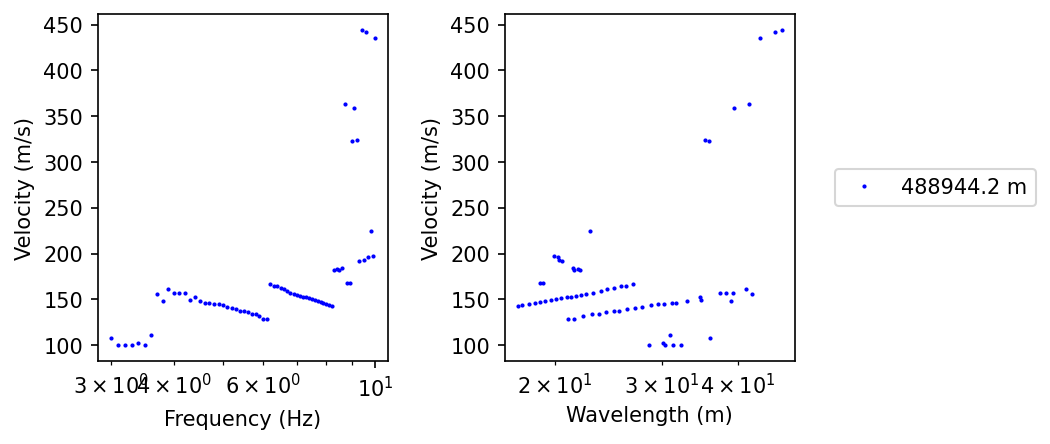

In [16]:
fig, axs = plt.subplots(ncols=len(xtype), figsize=(6,3), dpi=150, gridspec_kw=dict(wspace=0.4))
%matplotlib inline
xtype = [x for x, _ in domains]
ytype = [y for _, y in domains]
label = [f"{wavefieldtransform.array.source.x:.1f} m"]
peaksuite.plot(xtype=xtype, ax=axs, ytype=ytype, plot_kwargs=dict(color="blue", label=label))

axs[-1].legend(bbox_to_anchor = (1.1, 0.5), loc="center left")
plt.show()

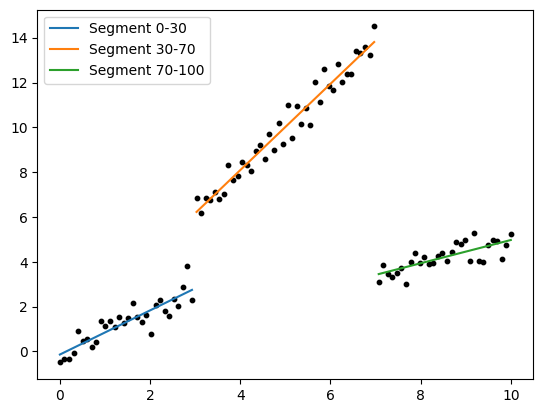

In [17]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def piecewise_linear_fit(x, y, max_error=1.0, min_size=10):
    def fit_segment(x, y):
        model = LinearRegression().fit(x.reshape(-1, 1), y)
        y_pred = model.predict(x.reshape(-1, 1))
        error = np.sum((y - y_pred) ** 2)
        return model, y_pred, error

    def segment_data(x, y, start, end):
        if end - start < min_size:
            return [(start, end)]

        model, y_pred, error = fit_segment(x[start:end], y[start:end])

        if error < max_error:
            return [(start, end)]

        best_split = None
        best_error = float('inf')

        for split in range(start + min_size, end - min_size):
            left_model, left_pred, left_error = fit_segment(x[start:split], y[start:split])
            right_model, right_pred, right_error = fit_segment(x[split:end], y[split:end])
            total_error = left_error + right_error

            if total_error < best_error:
                best_error = total_error
                best_split = split

        if best_split is None:
            return [(start, end)]

        return segment_data(x, y, start, best_split) + segment_data(x, y, best_split, end)

    segments = segment_data(x, y, 0, len(x))

    models = []
    for start, end in segments:
        model = LinearRegression().fit(x[start:end].reshape(-1, 1), y[start:end])
        models.append((model, start, end))

    return models

# Пример использования
x = np.linspace(0, 10, 100)
y = np.piecewise(x, [x < 3, (x >= 3) & (x < 7), x >= 7], [lambda x: x + np.random.normal(0, 0.5, len(x)), lambda x: 2*x + np.random.normal(0, 0.5, len(x)), lambda x: 0.5*x + np.random.normal(0, 0.5, len(x))])

models = piecewise_linear_fit(x, y, max_error=10.0, min_size=10)

# Визуализация результатов
plt.scatter(x, y, s=10, color='black')
for model, start, end in models:
    plt.plot(x[start:end], model.predict(x[start:end].reshape(-1, 1)), label=f'Segment {start}-{end}')
plt.legend()
plt.show()


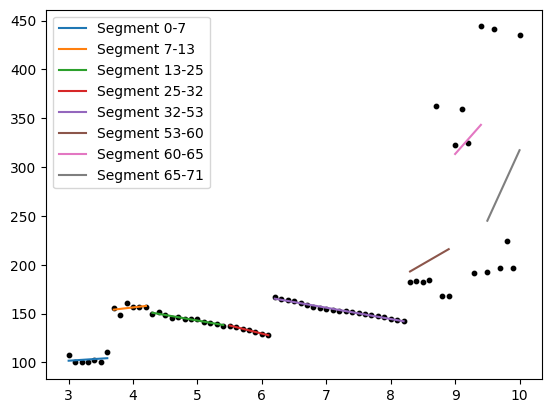

In [23]:
models = piecewise_linear_fit(fr, velo.reshape((-1)), max_error=20.0, min_size=5)
# Визуализация результатов
plt.scatter(fr, velo.reshape((-1)), s=10, color='black')
for model, start, end in models:
    plt.plot(fr[start:end], model.predict(fr[start:end].reshape(-1, 1)), label=f'Segment {start}-{end}')
plt.legend()
plt.show()

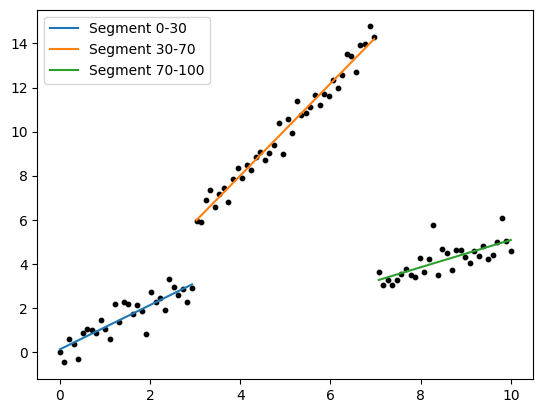

In [26]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def piecewise_linear_fit(x, y, max_error=1.0, min_size=10):
    def fit_segment(x, y):
        model = LinearRegression().fit(x.reshape(-1, 1), y)
        y_pred = model.predict(x.reshape(-1, 1))
        error = np.sum((y - y_pred) ** 2)
        return model, y_pred, error

    def segment_data(x, y, start, end):
        if end - start < min_size:
            return [(start, end)]

        model, y_pred, error = fit_segment(x[start:end], y[start:end])

        if error < max_error:
            return [(start, end)]

        best_split = None
        best_error = float('inf')

        for split in range(start + min_size, end - min_size):
            left_model, left_pred, left_error = fit_segment(x[start:split], y[start:split])
            right_model, right_pred, right_error = fit_segment(x[split:end], y[split:end])
            total_error = left_error + right_error

            if total_error < best_error:
                best_error = total_error
                best_split = split

        if best_split is None:
            return [(start, end)]

        return segment_data(x, y, start, best_split) + segment_data(x, y, best_split, end)

    def merge_segments(segments, x, y):
        merged_segments = []
        i = 0

        while i < len(segments):
            if i == len(segments) - 1:
                merged_segments.append(segments[i])
                break

            start1, end1 = segments[i]
            start2, end2 = segments[i + 1]

            model1, y_pred1, error1 = fit_segment(x[start1:end1], y[start1:end1])
            model2, y_pred2, error2 = fit_segment(x[start2:end2], y[start2:end2])

            combined_model, combined_y_pred, combined_error = fit_segment(x[start1:end2], y[start1:end2])

            if combined_error < max_error:
                merged_segments.append((start1, end2))
                i += 2
            else:
                merged_segments.append((start1, end1))
                i += 1

        return merged_segments

    segments = segment_data(x, y, 0, len(x))
    segments = merge_segments(segments, x, y)

    models = []
    for start, end in segments:
        model = LinearRegression().fit(x[start:end].reshape(-1, 1), y[start:end])
        models.append((model, start, end))

    return models

# Пример использования
x = np.linspace(0, 10, 100)
y = np.piecewise(x, [x < 3, (x >= 3) & (x < 7), x >= 7], [lambda x: x + np.random.normal(0, 0.5, len(x)), lambda x: 2*x + np.random.normal(0, 0.5, len(x)), lambda x: 0.5*x + np.random.normal(0, 0.5, len(x))])

models = piecewise_linear_fit(x, y, max_error=10.0, min_size=10)

# Визуализация результатов
plt.scatter(x, y, s=10, color='black')
for model, start, end in models:
    plt.plot(x[start:end], model.predict(x[start:end].reshape(-1, 1)), label=f'Segment {start}-{end}')
plt.legend()
plt.show()


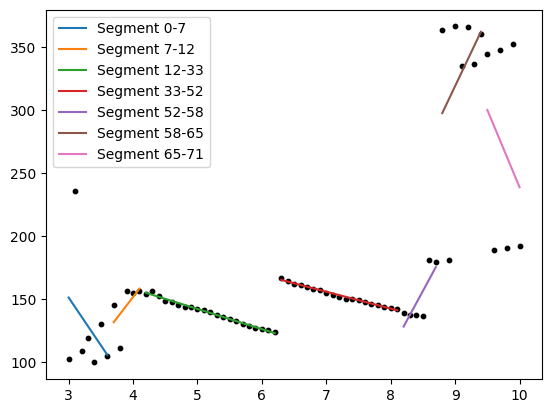

In [37]:
models = piecewise_linear_fit(fr, velo.reshape((-1)), max_error=40.0, min_size=5)
# Визуализация результатов
plt.scatter(fr, velo.reshape((-1)), s=10, color='black')
for model, start, end in models:
    plt.plot(fr[start:end], model.predict(fr[start:end].reshape(-1, 1)), label=f'Segment {start}-{end}')
plt.legend()
plt.show()

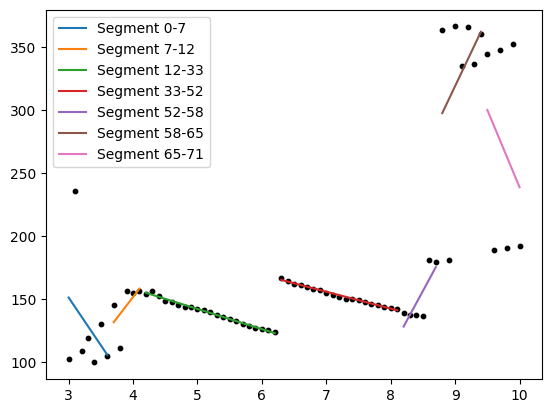

In [36]:
wavefieldtransform = swprocess.Masw.run(fnames="./Train_data/SGY/1.sgy", settings=settings)
peak = swprocess.peaks.Peaks(wavefieldtransform.frequencies,
                             wavefieldtransform.find_peak_power(by="frequency-maximum"),
                             identifier=label)
peaksuite = swprocess.PeaksSuite.from_peaks([peak])
fr, velo = peaksuite.to_array("frequency", "velocity", peak.frequency)
models = piecewise_linear_fit(fr, velo.reshape((-1)), max_error=40.0, min_size=5)
# Визуализация результатов
plt.scatter(fr, velo.reshape((-1)), s=10, color='black')
for model, start, end in models:
    plt.plot(fr[start:end], model.predict(fr[start:end].reshape(-1, 1)), label=f'Segment {start}-{end}')
plt.legend()
plt.show()

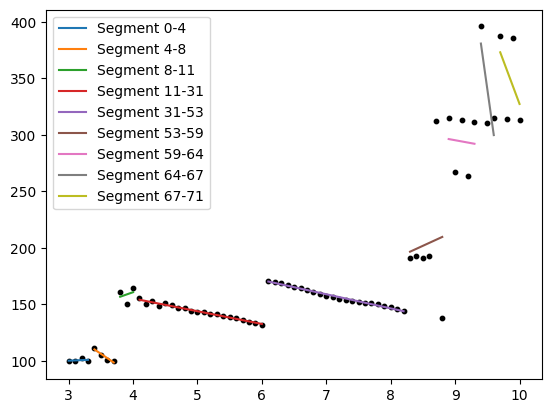

In [35]:
wavefieldtransform = swprocess.Masw.run(fnames="./Train_data/SGY/3.sgy", settings=settings)
peak = swprocess.peaks.Peaks(wavefieldtransform.frequencies,
                             wavefieldtransform.find_peak_power(by="frequency-maximum"),
                             identifier=label)
peaksuite = swprocess.PeaksSuite.from_peaks([peak])
fr, velo = peaksuite.to_array("frequency", "velocity", peak.frequency)
models = piecewise_linear_fit(fr, velo.reshape((-1)), max_error=40.0, min_size=3)
# Визуализация результатов
plt.scatter(fr, velo.reshape((-1)), s=10, color='black')
for model, start, end in models:
    plt.plot(fr[start:end], model.predict(fr[start:end].reshape(-1, 1)), label=f'Segment {start}-{end}')
plt.legend()
plt.show()

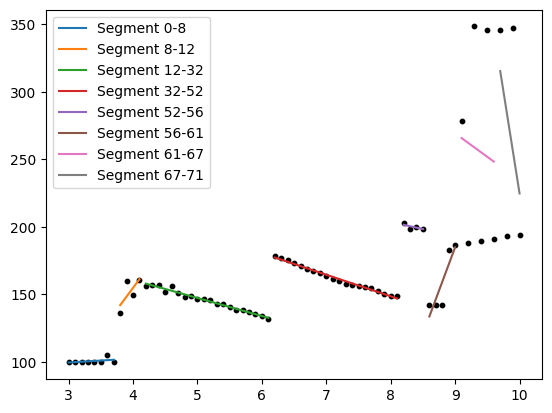

In [34]:
wavefieldtransform = swprocess.Masw.run(fnames="./Train_data/SGY/4.sgy", settings=settings)
peak = swprocess.peaks.Peaks(wavefieldtransform.frequencies,
                             wavefieldtransform.find_peak_power(by="frequency-maximum"),
                             identifier=label)
peaksuite = swprocess.PeaksSuite.from_peaks([peak])
fr, velo = peaksuite.to_array("frequency", "velocity", peak.frequency)
models = piecewise_linear_fit(fr, velo.reshape((-1)), max_error=40.0, min_size=3)
# Визуализация результатов
plt.scatter(fr, velo.reshape((-1)), s=10, color='black')
for model, start, end in models:
    plt.plot(fr[start:end], model.predict(fr[start:end].reshape(-1, 1)), label=f'Segment {start}-{end}')
plt.legend()
plt.show()

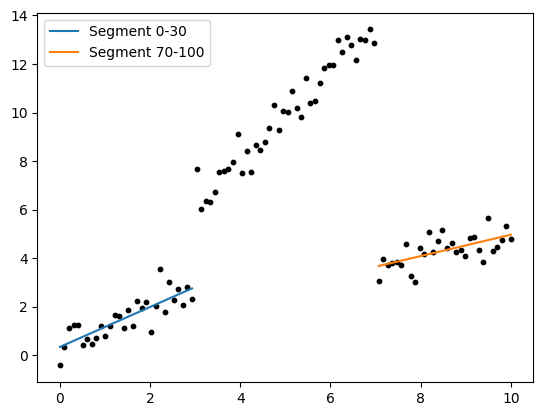

In [44]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def piecewise_linear_fit(x, y, max_error=1.0, min_size=10):
    def fit_segment(x, y):
        model = LinearRegression().fit(x.reshape(-1, 1), y)
        y_pred = model.predict(x.reshape(-1, 1))
        error = np.sum((y - y_pred) ** 2)
        return model, y_pred, error

    def segment_data(x, y, start, end):
        if end - start < min_size:
            return [(start, end)]

        model, y_pred, error = fit_segment(x[start:end], y[start:end])

        if error < max_error:
            return [(start, end)]

        best_split = None
        best_error = float('inf')

        for split in range(start + min_size, end - min_size):
            left_model, left_pred, left_error = fit_segment(x[start:split], y[start:split])
            right_model, right_pred, right_error = fit_segment(x[split:end], y[split:end])
            total_error = left_error + right_error

            if total_error < best_error:
                best_error = total_error
                best_split = split

        if best_split is None:
            return [(start, end)]

        return segment_data(x, y, start, best_split) + segment_data(x, y, best_split, end)

    def merge_segments(segments, x, y):
        merged_segments = []
        i = 0

        while i < len(segments):
            if i == len(segments) - 1:
                merged_segments.append(segments[i])
                break

            start1, end1 = segments[i]
            start2, end2 = segments[i + 1]

            model1, y_pred1, error1 = fit_segment(x[start1:end1], y[start1:end1])
            model2, y_pred2, error2 = fit_segment(x[start2:end2], y[start2:end2])

            combined_model, combined_y_pred, combined_error = fit_segment(x[start1:end2], y[start1:end2])

            if combined_error < max_error:
                merged_segments.append((start1, end2))
                i += 2
            else:
                merged_segments.append((start1, end1))
                i += 1

        return merged_segments

    def refine_segments(segments, x, y):
        while len(segments) > 2:
            min_length = float('inf')
            min_index = -1

            for i, (start, end) in enumerate(segments):
                if (end - start) < min_length:
                    min_length = end - start
                    min_index = i

            if min_index == -1:
                break

            start, end = segments[min_index]

            if min_index > 0:
                prev_start, prev_end = segments[min_index - 1]
                combined_model, combined_y_pred, combined_error = fit_segment(x[prev_start:end], y[prev_start:end])
                prev_model, prev_y_pred, prev_error = fit_segment(x[prev_start:prev_end], y[prev_start:prev_end])
                if combined_error <= prev_error + fit_segment(x[start:end], y[start:end])[2]:
                    segments[min_index - 1] = (prev_start, end)
                    segments.pop(min_index)
                    continue

            if min_index < len(segments) - 1:
                next_start, next_end = segments[min_index + 1]
                combined_model, combined_y_pred, combined_error = fit_segment(x[start:next_end], y[start:next_end])
                next_model, next_y_pred, next_error = fit_segment(x[next_start:next_end], y[next_start:next_end])
                if combined_error <= next_error + fit_segment(x[start:end], y[start:end])[2]:
                    segments[min_index + 1] = (start, next_end)
                    segments.pop(min_index)
                    continue

            for point in range(start, end):
                new_segments = segments[:min_index] + segments[min_index + 1:]
                if not any(start <= point <= end for (start, end) in new_segments):
                    segments.pop(min_index)
                    break

        return segments

    segments = segment_data(x, y, 0, len(x))
    segments = merge_segments(segments, x, y)
    segments = refine_segments(segments, x, y)

    models = []
    for start, end in segments:
        model = LinearRegression().fit(x[start:end].reshape(-1, 1), y[start:end])
        models.append((model, start, end))

    return models

# Пример использования
x = np.linspace(0, 10, 100)
y = np.piecewise(x, [x < 3, (x >= 3) & (x < 7), x >= 7], [lambda x: x + np.random.normal(0, 0.5, len(x)), lambda x: 2*x + np.random.normal(0, 0.5, len(x)), lambda x: 0.5*x + np.random.normal(0, 0.5, len(x))])

models = piecewise_linear_fit(x, y, max_error=10.0, min_size=10)

# Визуализация результатов
plt.scatter(x, y, s=10, color='black')
for model, start, end in models:
    plt.plot(x[start:end], model.predict(x[start:end].reshape(-1, 1)), label=f'Segment {start}-{end}')
plt.legend()
plt.show()


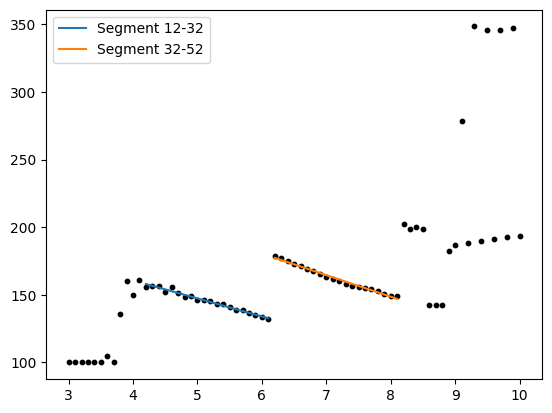

In [45]:
wavefieldtransform = swprocess.Masw.run(fnames="./Train_data/SGY/4.sgy", settings=settings)
peak = swprocess.peaks.Peaks(wavefieldtransform.frequencies,
                             wavefieldtransform.find_peak_power(by="frequency-maximum"),
                             identifier=label)
peaksuite = swprocess.PeaksSuite.from_peaks([peak])
fr, velo = peaksuite.to_array("frequency", "velocity", peak.frequency)
models = piecewise_linear_fit(fr, velo.reshape((-1)), max_error=40.0, min_size=3)
# Визуализация результатов
plt.scatter(fr, velo.reshape((-1)), s=10, color='black')
for model, start, end in models:
    plt.plot(fr[start:end], model.predict(fr[start:end].reshape(-1, 1)), label=f'Segment {start}-{end}')
plt.legend()
plt.show()

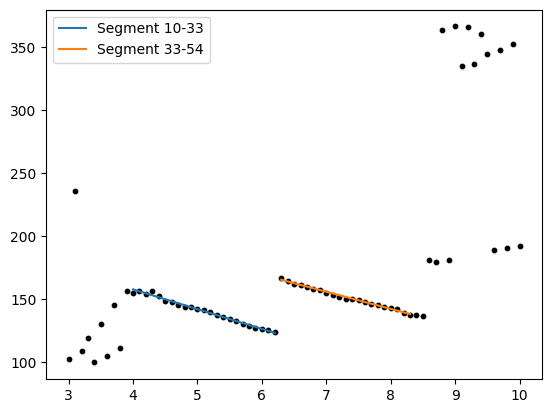

In [46]:
wavefieldtransform = swprocess.Masw.run(fnames="./Train_data/SGY/1.sgy", settings=settings)
peak = swprocess.peaks.Peaks(wavefieldtransform.frequencies,
                             wavefieldtransform.find_peak_power(by="frequency-maximum"),
                             identifier=label)
peaksuite = swprocess.PeaksSuite.from_peaks([peak])
fr, velo = peaksuite.to_array("frequency", "velocity", peak.frequency)
models = piecewise_linear_fit(fr, velo.reshape((-1)), max_error=40.0, min_size=3)
# Визуализация результатов
plt.scatter(fr, velo.reshape((-1)), s=10, color='black')
for model, start, end in models:
    plt.plot(fr[start:end], model.predict(fr[start:end].reshape(-1, 1)), label=f'Segment {start}-{end}')
plt.legend()
plt.show()

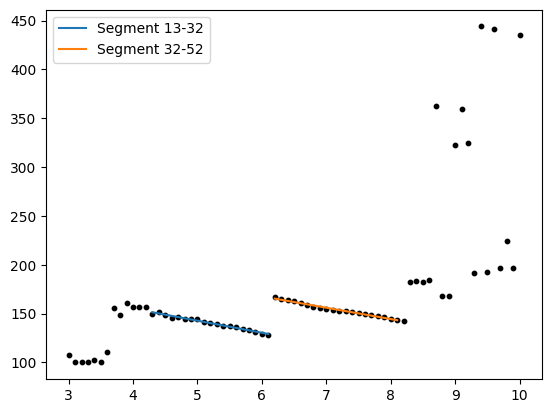

In [47]:
wavefieldtransform = swprocess.Masw.run(fnames="./Train_data/SGY/2.sgy", settings=settings)
peak = swprocess.peaks.Peaks(wavefieldtransform.frequencies,
                             wavefieldtransform.find_peak_power(by="frequency-maximum"),
                             identifier=label)
peaksuite = swprocess.PeaksSuite.from_peaks([peak])
fr, velo = peaksuite.to_array("frequency", "velocity", peak.frequency)
models = piecewise_linear_fit(fr, velo.reshape((-1)), max_error=40.0, min_size=3)
# Визуализация результатов
plt.scatter(fr, velo.reshape((-1)), s=10, color='black')
for model, start, end in models:
    plt.plot(fr[start:end], model.predict(fr[start:end].reshape(-1, 1)), label=f'Segment {start}-{end}')
plt.legend()
plt.show()

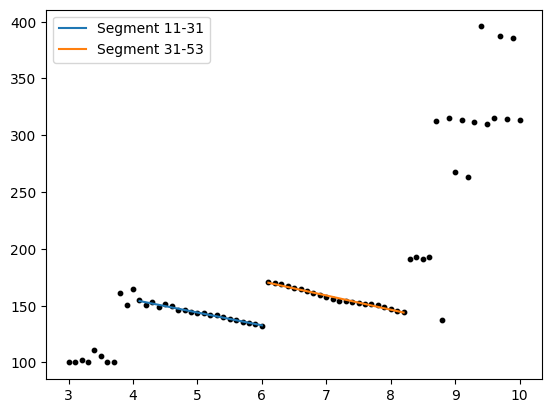

In [48]:
wavefieldtransform = swprocess.Masw.run(fnames="./Train_data/SGY/3.sgy", settings=settings)
peak = swprocess.peaks.Peaks(wavefieldtransform.frequencies,
                             wavefieldtransform.find_peak_power(by="frequency-maximum"),
                             identifier=label)
peaksuite = swprocess.PeaksSuite.from_peaks([peak])
fr, velo = peaksuite.to_array("frequency", "velocity", peak.frequency)
models = piecewise_linear_fit(fr, velo.reshape((-1)), max_error=40.0, min_size=3)
# Визуализация результатов
plt.scatter(fr, velo.reshape((-1)), s=10, color='black')
for model, start, end in models:
    plt.plot(fr[start:end], model.predict(fr[start:end].reshape(-1, 1)), label=f'Segment {start}-{end}')
plt.legend()
plt.show()

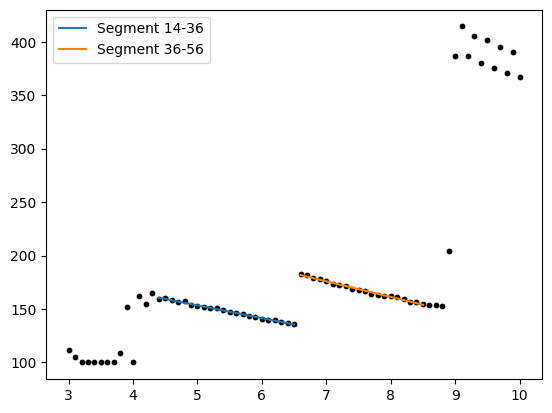

In [49]:
wavefieldtransform = swprocess.Masw.run(fnames="./Train_data/SGY/5.sgy", settings=settings)
peak = swprocess.peaks.Peaks(wavefieldtransform.frequencies,
                             wavefieldtransform.find_peak_power(by="frequency-maximum"),
                             identifier=label)
peaksuite = swprocess.PeaksSuite.from_peaks([peak])
fr, velo = peaksuite.to_array("frequency", "velocity", peak.frequency)
models = piecewise_linear_fit(fr, velo.reshape((-1)), max_error=40.0, min_size=3)
# Визуализация результатов
plt.scatter(fr, velo.reshape((-1)), s=10, color='black')
for model, start, end in models:
    plt.plot(fr[start:end], model.predict(fr[start:end].reshape(-1, 1)), label=f'Segment {start}-{end}')
plt.legend()
plt.show()